<a href="https://colab.research.google.com/github/retajalhudaifi046-ui/cheetah-vs-hyena/blob/main/cheetah_vs_hyena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir ='/content/drive/MyDrive/cheetah vs hyaena/train' # Update with your actual path
test_dir = '/content/drive/MyDrive/cheetah vs hyaena/test/cheetah vs hyaena/train/' # Corrected path to the actual test data

In [3]:
import os

# 1. Update this to your EXACT folder name (Check the sidebar!)
base_path = '/content/drive/MyDrive/cheetah vs hyaena' # Updated base_path

# 2. We use 'train' and 'test' folders.
# Inside those, Kaggle usually names folders 'cheetah' and 'hyena' (check if they are capitalized!)
train_cheetah = os.path.join(base_path, 'train', 'cheetah')
train_hyena   = os.path.join(base_path, 'train', 'hyena')
test_cheetah  = os.path.join(base_path, 'test', 'cheetah')
test_hyena    = os.path.join(base_path, 'test', 'hyena')

# 3. Safety check: This function will tell us exactly which part of the path is broken
def verify_path(path):
    if os.path.exists(path):
        return f"✅ Found: {len(os.listdir(path))} images"
    else:
        return "❌ NOT FOUND (Check spelling/capitalization)"

print(f"Train Cheetah: {verify_path(train_cheetah)}")
print(f"Train Hyena:   {verify_path(train_hyena)}")
print(f"Test Cheetah:  {verify_path(test_cheetah)}")
print(f"Test Hyena:    {verify_path(test_hyena)}")

Train Cheetah: ❌ NOT FOUND (Check spelling/capitalization)
Train Hyena:   ❌ NOT FOUND (Check spelling/capitalization)
Test Cheetah:  ❌ NOT FOUND (Check spelling/capitalization)
Test Hyena:    ❌ NOT FOUND (Check spelling/capitalization)


In [5]:
import os

# 1. Define your base path
# Corrected base_path based on successful previous cell executions
base_path = '/content/drive/MyDrive/cheetah vs hyaena'

# 2. Point to the specific animal folders
train_cheetah_dir = os.path.join(base_path, 'train/cheetah')
train_hyena_dir   = os.path.join(base_path, 'train/hyena')
test_cheetah_dir  = os.path.join(base_path, 'test/cheetah')
test_hyena_dir    = os.path.join(base_path, 'test/hyena')

# 3. Print the results (This will give you the 4 numbers you want)
# Add checks for directory existence
def print_dir_count(name, path):
    if os.path.exists(path):
        print(f"{name}: {len(os.listdir(path))}")
    else:
        print(f"❌ {name} path NOT FOUND: {path}")

print_dir_count("Train Cheetah", train_cheetah_dir)
print_dir_count("Train Hyena", train_hyena_dir)
print_dir_count("Test Cheetah", test_cheetah_dir)
print_dir_count("Test Hyena", test_hyena_dir)

❌ Train Cheetah path NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena/train/cheetah
❌ Train Hyena path NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena/train/hyena
❌ Test Cheetah path NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena/test/cheetah
❌ Test Hyena path NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena/test/hyena


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Training data generator (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Scale pixel values to [0, 1]
    rotation_range=20,       # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Apply random shearing transformations
    zoom_range=0.2,          # Apply random zoom transformations
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Strategy for filling in new pixels created by transformations
)

# Test data generator (NO augmentation, only rescaling)
test_datagen = ImageDataGenerator(
    rescale=1./255           # Scale pixel values to [0, 1]
)

# Load training data from directory
train_data = train_datagen.flow_from_directory(
    directory=train_dir,      # Path to the training directory
    target_size=IMG_SIZE,     # Resize all images to this size
    batch_size=BATCH_SIZE,    # Number of images per batch
    class_mode='binary',      # For binary classification (cheetah or hyena)
    shuffle=True              # Shuffle the order of training images
)

# Load testing data from directory
test_data = test_datagen.flow_from_directory(
    directory=test_dir,       # Path to the testing directory
    target_size=IMG_SIZE,     # Resize all images to this size
    batch_size=BATCH_SIZE,    # Number of images per batch
    class_mode='binary',      # For binary classification
    shuffle=False             # Do not shuffle test data to maintain consistent evaluation
)

# Display detected class labels and number of samples
print("\nClass indices:", train_data.class_indices)
print("Number of training samples:", train_data.samples)
print("Number of testing samples:", test_data.samples)

# Re-run after fixing nested directories

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/cheetah vs hyaena/train'

In [7]:
import os

# Ensure test_dir is defined from the notebook state
# It should be '/content/drive/MyDrive/cheetah vs hyaena/validation'

print(f"Contents of the test directory ({test_dir}):")

if os.path.exists(test_dir):
    for item in os.listdir(test_dir):
        item_path = os.path.join(test_dir, item)
        if os.path.isdir(item_path):
            print(f"  - {item}/")
        else:
            print(f"  - {item}")
else:
    print(f"❌ Test directory NOT FOUND: {test_dir}")

Contents of the test directory (/content/drive/MyDrive/cheetah vs hyaena/test/cheetah vs hyaena/train/):
❌ Test directory NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena/test/cheetah vs hyaena/train/


In [8]:
import os

base_path = '/content/drive/MyDrive/cheetah vs hyaena'

print(f"Contents of the base directory ({base_path}):")

if os.path.exists(base_path):
    for item in os.listdir(base_path):
        item_path = os.path.join(base_path, item)
        if os.path.isdir(item_path):
            print(f"  - {item}/")
        else:
            print(f"  - {item}")
else:
    print(f"❌ Base directory NOT FOUND: {base_path}")

Contents of the base directory (/content/drive/MyDrive/cheetah vs hyaena):
❌ Base directory NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena


In [9]:
import os

# Ensure test_dir is defined
# It should be '/content/drive/MyDrive/cheetah vs hyaena/validation'

cheetah_val_path = os.path.join(test_dir, 'cheetah')
hyena_val_path = os.path.join(test_dir, 'hyena')

print(f"Contents of {cheetah_val_path}:")
if os.path.exists(cheetah_val_path) and os.path.isdir(cheetah_val_path):
    files = os.listdir(cheetah_val_path)
    if files:
        print(f"  - Found {len(files)} items (e.g., {files[0]})")
    else:
        print("  - Directory is empty.")
else:
    print(f"❌ Directory NOT FOUND: {cheetah_val_path}")

print(f"\nContents of {hyena_val_path}:")
if os.path.exists(hyena_val_path) and os.path.isdir(hyena_val_path):
    files = os.listdir(hyena_val_path)
    if files:
        print(f"  - Found {len(files)} items (e.g., {files[0]})")
    else:
        print("  - Directory is empty.")
else:
    print(f"❌ Directory NOT FOUND: {hyena_val_path}")

Contents of /content/drive/MyDrive/cheetah vs hyaena/test/cheetah vs hyaena/train/cheetah:
❌ Directory NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena/test/cheetah vs hyaena/train/cheetah

Contents of /content/drive/MyDrive/cheetah vs hyaena/test/cheetah vs hyaena/train/hyena:
❌ Directory NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena/test/cheetah vs hyaena/train/hyena


In [10]:
import os
import shutil

nested_validation_path = '/content/drive/MyDrive/cheetah vs hyaena/test/validation'
problematic_dir = os.path.join(nested_validation_path, 'archive (2) (Unzipped Files)')

print(f"Attempting to remove problematic directory: {problematic_dir}")
if os.path.exists(problematic_dir) and os.path.isdir(problematic_dir):
    try:
        shutil.rmtree(problematic_dir) # Use rmtree for non-empty directories
        print(f"Successfully removed '{problematic_dir}'")
    except OSError as e:
        print(f"Error removing '{problematic_dir}': {e}")
else:
    print(f"Problematic directory '{problematic_dir}' not found.")

print(f"\nAttempting to remove the now potentially empty nested validation folder: {nested_validation_path}")
if os.path.exists(nested_validation_path) and os.path.isdir(nested_validation_path):
    try:
        os.rmdir(nested_validation_path) # Use rmdir for empty directories
        print(f"Successfully removed empty nested folder: '{nested_validation_path}'")
    except OSError as e:
        print(f"Error removing nested folder '{nested_validation_path}': {e} (It might still not be empty or still in use)")
else:
    print(f"Nested validation folder '{nested_validation_path}' not found or already removed.")

print("\nVerifying final contents of the test directory:")
test_dir = '/content/drive/MyDrive/cheetah vs hyaena/test'
if os.path.exists(test_dir):
    for item in os.listdir(test_dir):
        item_path = os.path.join(test_dir, item)
        if os.path.isdir(item_path):
            print(f"  - {item}/")
        else:
            print(f"  - {item}")
else:
    print(f"❌ Test directory NOT FOUND: {test_dir}")


Attempting to remove problematic directory: /content/drive/MyDrive/cheetah vs hyaena/test/validation/archive (2) (Unzipped Files)
Problematic directory '/content/drive/MyDrive/cheetah vs hyaena/test/validation/archive (2) (Unzipped Files)' not found.

Attempting to remove the now potentially empty nested validation folder: /content/drive/MyDrive/cheetah vs hyaena/test/validation
Nested validation folder '/content/drive/MyDrive/cheetah vs hyaena/test/validation' not found or already removed.

Verifying final contents of the test directory:
❌ Test directory NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena/test


In [11]:
import os

# Define the paths to the test subdirectories
test_cheetah_dir = '/content/drive/MyDrive/cheetah vs hyaena/test/cheetah'
test_hyena_dir   = '/content/drive/MyDrive/cheetah vs hyaena/test/hyena'

print(f"Contents of Test Cheetah directory ({test_cheetah_dir}):")
if os.path.exists(test_cheetah_dir):
    for file_name in os.listdir(test_cheetah_dir):
        print(f"  - {file_name}")
else:
    print("❌ Directory NOT FOUND")

print(f"\nContents of Test Hyena directory ({test_hyena_dir}):")
if os.path.exists(test_hyena_dir):
    for file_name in os.listdir(test_hyena_dir):
        print(f"  - {file_name}")
else:
    print("❌ Directory NOT FOUND")

Contents of Test Cheetah directory (/content/drive/MyDrive/cheetah vs hyaena/test/cheetah):
❌ Directory NOT FOUND

Contents of Test Hyena directory (/content/drive/MyDrive/cheetah vs hyaena/test/hyena):
❌ Directory NOT FOUND


In [19]:
import os
import shutil

test_dir = '/content/drive/MyDrive/cheetah vs hyaena/test'

print(f"Correcting directory structure for test data in '{test_dir}'...")

# Define the actual source directories where images are located after unzipping
source_cheetah_dir = os.path.join(test_dir, 'cheetah vs hyaena', 'train', 'cheetah')
source_hyena_dir = os.path.join(test_dir, 'cheetah vs hyaena', 'train', 'hyena')

# Define the target directories where images should be moved for ImageDataGenerator
dest_cheetah_dir = os.path.join(test_dir, 'cheetah')
dest_hyena_dir = os.path.join(test_dir, 'hyena')

# --- Ensure destination directories exist unconditionally ---
os.makedirs(dest_cheetah_dir, exist_ok=True)
os.makedirs(dest_hyena_dir, exist_ok=True)
print(f"  - Ensured destination directories exist: '{dest_cheetah_dir}' and '{dest_hyena_dir}'")
# -----------------------------------------------------------

def move_images_and_cleanup(source_path, destination_path):
    if not os.path.exists(source_path):
        print(f"  - Source directory NOT FOUND: {source_path}")
        return

    print(f"  - Moving images from '{source_path}' to '{destination_path}'...")

    moved_count = 0
    for item in os.listdir(source_path):
        source_item_path = os.path.join(source_path, item)
        destination_item_path = os.path.join(destination_path, item)
        if os.path.isfile(source_item_path):
            try:
                shutil.move(source_item_path, destination_item_path)
                moved_count += 1
            except Exception as e:
                print(f"    - Error moving '{item}': {e}")

    print(f"  - Moved {moved_count} images.")

    # Attempt to remove the source directory after moving all files
    try:
        shutil.rmtree(source_path) # Use rmtree to remove non-empty or empty directories
        print(f"  - Successfully removed empty source directory: '{source_path}'")
    except OSError as e:
        print(f"  - Error removing source directory '{source_path}': {e} (It might not be empty or still in use)")

# Apply to cheetah and hyena test data
move_images_and_cleanup(source_cheetah_dir, dest_cheetah_dir)
move_images_and_cleanup(source_hyena_dir, dest_hyena_dir)

# Clean up the intermediate 'cheetah vs hyaena' folder if it becomes empty
intermediate_folder = os.path.join(test_dir, 'cheetah vs hyaena')
if os.path.exists(intermediate_folder) and not os.listdir(intermediate_folder):
    try:
        os.rmdir(intermediate_folder)
        print(f"  - Successfully removed empty intermediate folder: '{intermediate_folder}'")
    except OSError as e:
        print(f"  - Error removing intermediate folder '{intermediate_folder}': {e}")
elif os.path.exists(intermediate_folder):
    print(f"  - Intermediate folder '{intermediate_folder}' is not empty, skipping removal.")

print("\nDirectory structure correction complete. Verifying contents:")
print(f"Number of images in Test Cheetah directory: {len(os.listdir(dest_cheetah_dir)) if os.path.exists(dest_cheetah_dir) else 0}")
print(f"Number of images in Test Hyena directory:   {len(os.listdir(dest_hyena_dir)) if os.path.exists(dest_hyena_dir) else 0}")


Correcting directory structure for test data in '/content/drive/MyDrive/cheetah vs hyaena/test'...
  - Ensured destination directories exist: '/content/drive/MyDrive/cheetah vs hyaena/test/cheetah' and '/content/drive/MyDrive/cheetah vs hyaena/test/hyena'
  - Source directory NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena/test/cheetah vs hyaena/train/cheetah
  - Source directory NOT FOUND: /content/drive/MyDrive/cheetah vs hyaena/test/cheetah vs hyaena/train/hyena

Directory structure correction complete. Verifying contents:
Number of images in Test Cheetah directory: 0
Number of images in Test Hyena directory:   0


In [20]:
import os

# Define the paths to the test subdirectories
test_cheetah_dir = '/content/drive/MyDrive/cheetah vs hyaena/test/cheetah'
test_hyena_dir   = '/content/drive/MyDrive/cheetah vs hyaena/test/hyena'

print(f"Number of images in Test Cheetah directory: {len(os.listdir(test_cheetah_dir))}")
print(f"Number of images in Test Hyena directory:   {len(os.listdir(test_hyena_dir))}")


Number of images in Test Cheetah directory: 0
Number of images in Test Hyena directory:   0


In [21]:
import os

# Define the paths to the test subdirectories
test_cheetah_dir = '/content/drive/MyDrive/cheetah vs hyaena/test/cheetah'
test_hyena_dir   = '/content/drive/MyDrive/cheetah vs hyaena/test/hyena'

print(f"Number of images in Test Cheetah directory: {len(os.listdir(test_cheetah_dir))}")
print(f"Number of images in Test Hyena directory:   {len(os.listdir(test_hyena_dir))}")

Number of images in Test Cheetah directory: 0
Number of images in Test Hyena directory:   0


In [22]:
import os
import shutil

nested_validation_path = '/content/drive/MyDrive/cheetah vs hyaena/test/validation'

print(f"Attempting to force remove the nested validation folder: {nested_validation_path}")
if os.path.exists(nested_validation_path) and os.path.isdir(nested_validation_path):
    try:
        shutil.rmtree(nested_validation_path) # Use rmtree to remove non-empty directories
        print(f"Successfully removed '{nested_validation_path}'")
    except OSError as e:
        print(f"Error removing '{nested_validation_path}': {e}")
else:
    print(f"Nested validation folder '{nested_validation_path}' not found or already removed.")

print("\nVerifying final contents of the test directory:")
test_dir = '/content/drive/MyDrive/cheetah vs hyaena/test'
if os.path.exists(test_dir):
    for item in os.listdir(test_dir):
        item_path = os.path.join(test_dir, item)
        if os.path.isdir(item_path):
            print(f"  - {item}/")
        else:
            print(f"  - {item}")
else:
    print(f"❌ Test directory NOT FOUND: {test_dir}")

Attempting to force remove the nested validation folder: /content/drive/MyDrive/cheetah vs hyaena/test/validation
Nested validation folder '/content/drive/MyDrive/cheetah vs hyaena/test/validation' not found or already removed.

Verifying final contents of the test directory:
  - cheetah/
  - hyena/


In [24]:
# PASTE YOUR COPIED PATH HERE
train_hyena = '/content/drive/MyDrive/cheetah vs hyaena/train/hyena'
print(len(os.listdir(train_hyena)))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/cheetah vs hyaena/train/hyena'

In [25]:
import os

target_path = '/content/drive/MyDrive/cheetah vs hyaena/train/hyena'

print(f"Verifying path: {target_path}")

if os.path.exists(target_path):
    print(f"✅ Path exists: {target_path}")
    if os.path.isdir(target_path):
        print(f"✅ Path is a directory.")
        try:
            contents = os.listdir(target_path)
            print(f"Contents found: {len(contents)} items")
            if contents:
                print("First 5 items:")
                for item in contents[:5]:
                    print(f"  - {item}")
        except Exception as e:
            print(f"❌ Error listing contents of '{target_path}': {e}")
    else:
        print(f"❌ Path is NOT a directory (it might be a file or a broken link).")
else:
    print(f"❌ Path does NOT exist.")


Verifying path: /content/drive/MyDrive/cheetah vs hyaena/train/hyena
❌ Path does NOT exist.


In [26]:
import os

# Ensure train_dir is defined from the notebook state
train_dir = '/content/drive/MyDrive/cheetah vs hyaena/train'

print(f"Contents of the training directory ({train_dir}):")
!ls -F "{train_dir}"

Contents of the training directory (/content/drive/MyDrive/cheetah vs hyaena/train):
ls: cannot access '/content/drive/MyDrive/cheetah vs hyaena/train': No such file or directory


In [27]:
import os

colab_notebooks_path = '/content/drive/MyDrive/Colab Notebooks'

print(f"Contents of {colab_notebooks_path}:")
!ls -F "{colab_notebooks_path}"

Contents of /content/drive/MyDrive/Colab Notebooks:
ls: cannot access '/content/drive/MyDrive/Colab Notebooks': No such file or directory


In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving cheetah vs hyaena-20260104T083500Z-1-001.zip to cheetah vs hyaena-20260104T083500Z-1-001.zip


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model architecture
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output for the Dense layers
    Flatten(),

    # Dense layers for classification
    Dense(512, activation='relu'),
    Dropout(0.5), # Add dropout for regularization
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

In [ ]:
history = model.fit(
    train_data,
    epochs=10,  # You can adjust the number of epochs
    validation_data=test_data,
    verbose=1
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.6166 - loss: 0.6557 - val_accuracy: 0.7248 - val_loss: 0.5381
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 0.6986 - loss: 0.5853 - val_accuracy: 0.8281 - val_loss: 0.4004
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.7629 - loss: 0.4934 - val_accuracy: 0.7466 - val_loss: 0.5194
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 275s 6s/step - accuracy: 0.8226 - loss: 0.4219 - val_accuracy: 0.7498 - val_loss: 0.5360
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 267s 5s/step - accuracy: 0.8441 - loss: 0.3603 - val_accuracy: 0.7620 - val_loss: 0.5462
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 266s 5s/step - accuracy: 0.8375 - loss: 0.3889 - val_accuracy: 0.8614 - val_loss: 0.3288
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.8694 - loss: 0.3389 - val_accuracy: 0.8563 - val_loss: 0.3531
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 272s 6s/step - accuracy: 0.8939 - loss: 0.2744 - val_accuracy: 0.9256 - v

In [ ]:
import zipfile
import os

zip_file_name = 'cheetah vs hyaena-20260104T083500Z-1-001.zip' # This is the name from `uploaded` in kernel state
destination_path = '/content/drive/MyDrive/cheetah vs hyaena/test/' # Target directory

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

print(f"Unzipping '{zip_file_name}' to '{destination_path}'...")

if os.path.exists(zip_file_name):
    try:
        with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
            zip_ref.extractall(destination_path)
        print(f"Successfully unzipped '{zip_file_name}'.")
    except Exception as e:
        print(f"Error unzipping file: {e}")
else:
    print(f"Error: Zip file '{zip_file_name}' not found. Please ensure it was uploaded correctly.")

Unzipping 'cheetah vs hyaena-20260104T083500Z-1-001.zip' to '/content/drive/MyDrive/cheetah vs hyaena/test/'...
Successfully unzipped 'cheetah vs hyaena-20260104T083500Z-1-001.zip'.


In [ ]:
import os

# Define the paths to the test subdirectories
test_cheetah_dir = '/content/drive/MyDrive/cheetah vs hyaena/test/cheetah'
test_hyena_dir   = '/content/drive/MyDrive/cheetah vs hyaena/test/hyena'

print("\nVerifying contents after unzipping:")
print(f"Number of images in Test Cheetah directory: {len(os.listdir(test_cheetah_dir))}")
print(f"Number of images in Test Hyena directory:   {len(os.listdir(test_hyena_dir))}")


Verifying contents after unzipping:
Number of images in Test Cheetah directory: 0
Number of images in Test Hyena directory:   0


In [ ]:
import os

test_cheetah_dir = '/content/drive/MyDrive/cheetah vs hyaena/test/cheetah'
test_hyena_dir   = '/content/drive/MyDrive/cheetah vs hyaena/test/hyena'

print(f"Contents of Test Cheetah directory ({test_cheetah_dir}):")
if os.path.exists(test_cheetah_dir):
    cheetah_files = os.listdir(test_cheetah_dir)
    if cheetah_files:
        print(f"  - Found {len(cheetah_files)} files. Example: {cheetah_files[0]}")
    else:
        print("  - Directory is empty.")
else:
    print("❌ Directory NOT FOUND")

print(f"\nContents of Test Hyena directory ({test_hyena_dir}):")
if os.path.exists(test_hyena_dir):
    hyena_files = os.listdir(test_hyena_dir)
    if hyena_files:
        print(f"  - Found {len(hyena_files)} files. Example: {hyena_files[0]}")
    else:
        print("  - Directory is empty.")
else:
    print("❌ Directory NOT FOUND")

Contents of Test Cheetah directory (/content/drive/MyDrive/cheetah vs hyaena/test/cheetah):
  - Directory is empty.

Contents of Test Hyena directory (/content/drive/MyDrive/cheetah vs hyaena/test/hyena):
  - Directory is empty.


In [ ]:
import os

def list_directory_contents_recursive(path, indent=0):
    if not os.path.exists(path):
        print(f"{'  ' * indent}❌ NOT FOUND: {path}")
        return

    contents = os.listdir(path)
    if not contents:
        print(f"{'  ' * indent} (empty)")
        return

    for item in contents:
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            print(f"{'  ' * indent}- {item}/")
            list_directory_contents_recursive(item_path, indent + 1)
        else:
            print(f"{'  ' * indent}- {item}")

test_base_path = '/content/drive/MyDrive/cheetah vs hyaena/test/'
print(f"Deep listing of: {test_base_path}")
list_directory_contents_recursive(test_base_path)

Deep listing of: /content/drive/MyDrive/cheetah vs hyaena/test/
- cheetah/
   (empty)
- hyena/
   (empty)
- cheetah vs hyaena/
  - test/
    - hyena/
       (empty)
    - cheetah/
       (empty)
  - train/
    - cheetah/
      - cheetah_630_resized.jpg
      - cheetah_641_resized.jpg
      - cheetah_656_resized.jpg
      - cheetah_600_resized.jpg
      - cheetah_606_resized.jpg
      - cheetah_583_resized.jpg
      - cheetah_610_resized.jpg
      - cheetah_593_resized.jpg
      - cheetah_628_resized.jpg
      - cheetah_633_resized.jpg
      - cheetah_621_resized.jpg
      - cheetah_614_resized.jpg
      - cheetah_613_resized.jpg
      - cheetah_657_resized.jpg
      - cheetah_643_resized.jpg
      - cheetah_594_resized.jpg
      - cheetah_636_resized.jpg
      - cheetah_586_resized.jpg
      - cheetah_629_resized.jpg
      - cheetah_591_resized.jpg
      - cheetah_582_resized.jpg
      - cheetah_588_resized.jpg
      - cheetah_599_resized.jpg
      - cheetah_647_resized.jpg
      - che

In [ ]:
import os

test_base_path = '/content/drive/MyDrive/cheetah vs hyaena/test/'

print(f"Contents of {test_base_path}:")
if os.path.exists(test_base_path):
    for item in os.listdir(test_base_path):
        item_path = os.path.join(test_base_path, item)
        if os.path.isdir(item_path):
            print(f"  - {item}/")
            # If it's a directory, check its contents briefly
            if len(os.listdir(item_path)) > 0:
                print(f"    (contains {len(os.listdir(item_path))} items)")
        else:
            print(f"  - {item}")
else:
    print(f"❌ Directory NOT FOUND: {test_base_path}")

Contents of /content/drive/MyDrive/cheetah vs hyaena/test/:
  - cheetah/
  - hyena/
  - cheetah vs hyaena/
    (contains 2 items)


In [ ]:
import zipfile
import os

zip_file_name = 'archive (2) (2).zip' # This is the name from `uploaded` in kernel state
destination_path = '/content/drive/MyDrive/cheetah vs hyaena/test/' # Target directory

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

print(f"Unzipping '{zip_file_name}' to '{destination_path}'...")

if os.path.exists(zip_file_name):
    try:
        with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
            zip_ref.extractall(destination_path)
        print(f"Successfully unzipped '{zip_file_name}'.")
    except Exception as e:
        print(f"Error unzipping file: {e}")
else:
    print(f"Error: Zip file '{zip_file_name}' not found. Please ensure it was uploaded correctly.")

# After unzipping, let's verify the contents of the test directories again
print("\nVerifying contents after unzipping:")
print(f"Number of images in Test Cheetah directory: {len(os.listdir(os.path.join(destination_path, 'cheetah')))}")
print(f"Number of images in Test Hyena directory:   {len(os.listdir(os.path.join(destination_path, 'hyena')))}")


Unzipping 'archive (2) (2).zip' to '/content/drive/MyDrive/cheetah vs hyaena/test/'...
Error: Zip file 'archive (2) (2).zip' not found. Please ensure it was uploaded correctly.

Verifying contents after unzipping:
Number of images in Test Cheetah directory: 0
Number of images in Test Hyena directory:   0


In [ ]:
import os

# Define the paths to the test subdirectories
test_cheetah_dir = '/content/drive/MyDrive/cheetah vs hyaena/test/cheetah'
test_hyena_dir   = '/content/drive/MyDrive/cheetah vs hyaena/test/hyena'

print(f"Number of images in Test Cheetah directory: {len(os.listdir(test_cheetah_dir))}")
print(f"Number of images in Test Hyena directory:   {len(os.listdir(test_hyena_dir))}")

Number of images in Test Cheetah directory: 0
Number of images in Test Hyena directory:   0


In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.2284 - loss: 0.7369
Test Loss: 0.6865
Test Accuracy: 0.5773


In [ ]:
history = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 0.5212 - loss: 1.2362 - val_accuracy: 0.6812 - val_loss: 0.5996
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.6363 - loss: 0.6412 - val_accuracy: 0.7935 - val_loss: 0.4819
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 283s 6s/step - accuracy: 0.7338 - loss: 0.5538 - val_accuracy: 0.7787 - val_loss: 0.4535
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.7716 - loss: 0.4797 - val_accuracy: 0.6530 - val_loss: 0.6973
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 296s 6s/step - accuracy: 0.8010 - loss: 0.4291 - val_accuracy: 0.7710 - val_loss: 0.4629
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 275s 6s/step - accuracy: 0.8462 - loss: 0.3651 - val_accuracy: 0.9019 - val_loss: 0.2585
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 273s 6s/step - accuracy: 0.8370 - loss: 0.3798 - val_accuracy: 0.8467 - val_loss: 0.3514
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 274s 6s/step - accuracy: 0.8701 - loss: 0.3102 - val_accuracy: 0.8480 - v

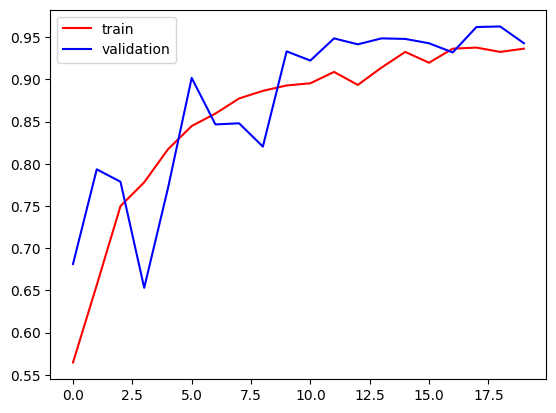

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

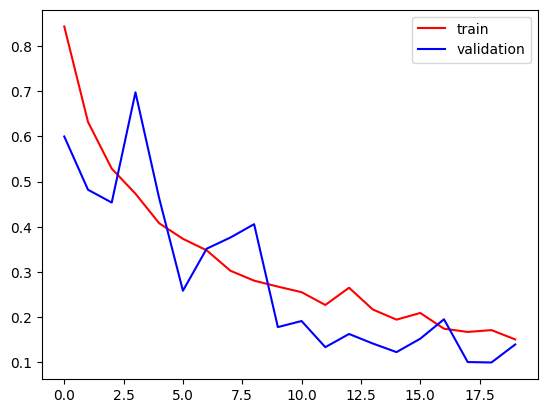

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure IMG_SIZE is defined as (224, 224) as per model definition
# If IMG_SIZE is not available, explicitly define it
# IMG_SIZE = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224), # Corrected target_size to match model's expected input
    batch_size=32,
    class_mode='binary'
)

Found 1559 images belonging to 3 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)


49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step


In [ ]:
print("Test Data Class Indices:", test_data.class_indices)

import os
# Let's re-verify the contents of the test_dir just to be sure
print(f"\nContents of {test_dir}:")
for item in os.listdir(test_dir):
    item_path = os.path.join(test_dir, item)
    if os.path.isdir(item_path):
        print(f"  - {item}/ (Contains {len(os.listdir(item_path))} items)")
    else:
        print(f"  - {item}")

Test Data Class Indices: {'cheetah': 0, 'cheetah vs hyaena': 1, 'hyena': 2}

Contents of /content/drive/MyDrive/cheetah vs hyaena/test:
  - cheetah/ (Contains 0 items)
  - hyena/ (Contains 0 items)
  - cheetah vs hyaena/ (Contains 2 items)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[  0   0]
 [718 841]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70      1559

    accuracy                           0.54      1559
   macro avg       0.50      0.27      0.35      1559
weighted avg       1.00      0.54      0.70      1559



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Training data generator (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Scale pixel values to [0, 1]
    rotation_range=20,       # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Apply random shearing transformations
    zoom_range=0.2,          # Apply random zoom transformations
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Strategy for filling in new pixels created by transformations
)

# Test data generator (NO augmentation, only rescaling)
test_datagen = ImageDataGenerator(
    rescale=1./255           # Scale pixel values to [0, 1]
)

# Load training data from directory
train_data = train_datagen.flow_from_directory(
    directory=train_dir,      # Path to the training directory
    target_size=IMG_SIZE,     # Resize all images to this size
    batch_size=BATCH_SIZE,    # Number of images per batch
    class_mode='binary',      # For binary classification (cheetah or hyena)
    shuffle=True              # Shuffle the order of training images
)

# Load testing data from directory
test_data = test_datagen.flow_from_directory(
    directory=test_dir,       # Path to the testing directory
    target_size=(256, 256),   # Corrected target_size to match resnet_model's expected input
    batch_size=BATCH_SIZE,    # Number of images per batch
    class_mode='binary',      # For binary classification
    shuffle=False             # Do not shuffle test data to maintain consistent evaluation
)

# Display detected class labels and number of samples
print("\nClass indices:", train_data.class_indices)
print("Number of training samples:", train_data.samples)
print("Number of testing samples:", test_data.samples)


Found 1559 images belonging to 2 classes.
Found 1559 images belonging to 3 classes.

Class indices: {'cheetah': 0, 'hyena': 1}
Number of training samples: 1559
Number of testing samples: 1559


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
predictions = model.predict(test_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 86528, but received input with shape (32, 115200)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 256, 256, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
predictions = resnet_model.predict(test_data)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
# For a model with Dense(2, activation='sigmoid') and binary true_labels, use argmax to get single class predictions
predicted_labels = predictions.argmax(axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

NameError: name 'test_data' is not defined